# 0. Imports

In [1]:
import pyxdf
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
#import wave
#import pyaudio
import numpy as np
from fpdf import FPDF
from glob import glob
import os


In [2]:
data_dir = '/Users/bryan.gonzalez/PycharmProjects/MOBI2024/CUNY_FACIAL/Data/real_subjects'
subject_xdf_paths = glob(os.path.join(data_dir,'*', '*.xdf'))
subject_xdf_paths.sort()
sub_ids = [x.split('/')[-1].split('_')[0] for x in subject_xdf_paths]
df = pd.DataFrame({
    'Subject': sub_ids, 
    'Date':[0] * len(sub_ids),
    'EGI NetAmp 0':[0] * len(sub_ids),
    'OpenSignals':[0] * len(sub_ids),
    'WebcamStream':[0]  * len(sub_ids),
    'Tobii':[0] * len(sub_ids),
    'Stimuli_Markers':[0] * len(sub_ids),
    'Microphone':[0] * len(sub_ids)})

In [3]:
for i, subject in enumerate(sub_ids):
    data, header = pyxdf.load_xdf(subject_xdf_paths[i])
    streams_collected = [stream['info']['name'][0] for stream in data]
    streams_collected
    df.loc[df['Subject'] == subject, 'datetime'] = header['info']['datetime'][0]
    for s in streams_collected:
        df.loc[df['Subject'] == subject, s] = 1

In [4]:
df['date'] = pd.to_datetime(df['datetime']).dt.date
df.sort_values(by='date', inplace=True)

In [5]:
df['count'] = [len(df.loc[df.date <= d]) for d in df.date]

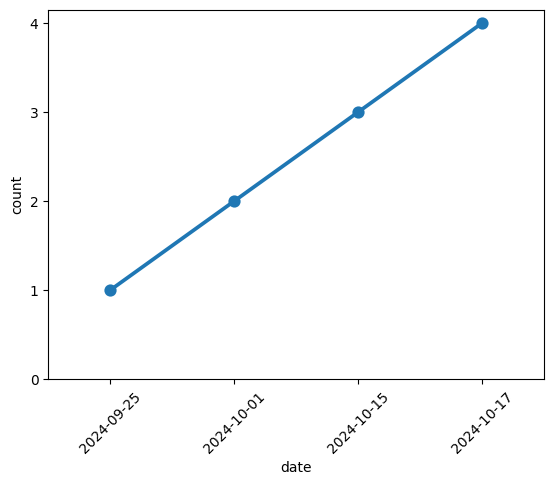

In [11]:
sns.pointplot(x='date', y='count', data=df)
plt.xticks(rotation=45);
# make sure y axis is integers
plt.yticks(np.arange(0, df['count'].max() + 1, 1));
plt.savefig('data_collection.png')

In [17]:
df.columns

Index(['Subject', 'Date', 'EGI NetAmp 0', 'OpenSignals', 'WebcamStream',
       'Tobii', 'Stimuli_Markers', 'Microphone', 'datetime', 'date', 'count'],
      dtype='object')

In [9]:
streams = ['EGI NetAmp 0', 'OpenSignals', 'WebcamStream',
       'Tobii', 'Stimuli_Markers', 'Microphone']
calculated_values = {}
# Get percentage of subjects that have each stream
calculated_values = {s: f'{df[s].sum() / len(df) * 100} %'  for s in streams}

# Goal
To create a pdf report with values calculated in this python code

In [7]:
def create_pdf(claculated_values, file_name = "output_testfile.pdf"):
    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=15)
    pdf.add_page()
    #set font for the title
    pdf.set_font("Arial", size=12)
    #Title of the document
    pdf.cell(200, 10, "CUNY Data Report",ln=True, align='C')
    pdf.cell(200, 10, txt="Plot in PDF Example", ln=True, align='C')

    # Step 3: Insert the plot image into the PDF
    # The parameters are (x-position, y-position, width, height)
    pdf.image('data_collection.png', x=10, y=30, w=180, h=140)

    # add calculated values
    for key, value in claculated_values.items():
        pdf.ln(2)
        pdf.cell(200, 5, txt= f"{key}" + " : " + str(value), ln=True, align='L')

    pdf.output(file_name)

In [7]:
a = 10
b = 5
sum_result = a + b
product_result = a * b
difference_result = a - b
quotient_result = a / b

# Store the calculated values in a dictionary
calulated_values = {
    "Sum": sum_result,
    "Product": product_result,
    "Difference": difference_result,
    "Quotient": quotient_result
}

In [12]:
create_pdf(calculated_values)